### Libraries

In [921]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import cluster_optics_dbscan


### Data Preprocessing

In [922]:
data = pd.read_csv('../data/water_potability.csv')
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### NULLS

In [923]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [924]:
data[data.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [925]:
data_cleaned = data.dropna()
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [926]:
data_cleaned.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [927]:
data_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


### Features

In [928]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [929]:
weights = data_cleaned / data_cleaned.max()
for column in data_cleaned.columns:
    data_cleaned[column + '_weight'] = data_cleaned[column] / data_cleaned[column].max()

/var/folders/gr/7t9xd0hs7j157_nrtlxsgdhc0000gn/T/ipykernel_2239/1759986356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column + '_weight'] = data_cleaned[column] / data_cleaned[column].max()
/var/folders/gr/7t9xd0hs7j157_nrtlxsgdhc0000gn/T/ipykernel_2239/1759986356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column + '_weight'] = data_cleaned[column] / data_cleaned[column].max()
/var/folders/gr/7t9xd0hs7j157_nrtlxsgdhc0000gn/T/ipykernel_2239/1759986356.py:3: Setting

In [930]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_weight,Hardness_weight,Solids_weight,Chloramines_weight,Sulfate_weight,Conductivity_weight,Organic_carbon_weight,Trihalomethanes_weight,Turbidity_weight,Potability_weight
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0.594055,0.675536,0.389785,0.613951,0.741920,0.482206,0.682665,0.809207,0.712694,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0.649445,0.570689,0.318276,0.498713,0.644732,0.528857,0.427978,0.258048,0.627442,0.0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0.398863,0.593415,0.508928,0.574760,0.679122,0.372298,0.311024,0.442886,0.394120,0.0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0.730276,0.781727,0.508947,0.572363,0.818375,0.376524,0.510603,0.682287,0.411562,0.0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0.616846,0.640835,0.242032,0.347605,0.630541,0.630002,0.457805,0.506438,0.677690,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,0.642136,0.677660,0.281851,0.479722,0.650543,0.518237,0.366543,0.444107,0.710396,1.0
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,0.478753,0.653313,0.305316,0.587196,0.633037,0.437073,0.600492,0.232892,0.530118,1.0
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,0.820786,0.298775,0.658341,0.705658,0.538283,0.583922,0.598842,0.335149,0.672738,1.0
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,0.433544,0.588202,0.462726,0.590199,0.718666,0.552056,0.446838,0.487257,0.565028,1.0


In [931]:
weights = {
    'Trihalomethanes': 0.05, 
    'Sulfate': 0.05, 
    'Chloramines': 0.1, 
    'Conductivity': 0.1, 
    'Organic_carbon': 0.1, 
    'Turbidity': 0.15,
    'ph':0.15,
    'Hardness': 0.15,
    'Solids': 0.15
}

In [932]:
data_cleaned['contaminationLevel'] = data_cleaned.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)

/var/folders/gr/7t9xd0hs7j157_nrtlxsgdhc0000gn/T/ipykernel_2239/231736569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contaminationLevel'] = data_cleaned.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)


In [933]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Hardness_weight,Solids_weight,Chloramines_weight,Sulfate_weight,Conductivity_weight,Organic_carbon_weight,Trihalomethanes_weight,Turbidity_weight,Potability_weight,contaminationLevel
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,...,0.675536,0.389785,0.613951,0.741920,0.482206,0.682665,0.809207,0.712694,0.0,3398.698083
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,...,0.570689,0.318276,0.498713,0.644732,0.528857,0.427978,0.258048,0.627442,0.0,2784.746528
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,...,0.593415,0.508928,0.574760,0.679122,0.372298,0.311024,0.442886,0.394120,0.0,4390.492792
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,...,0.781727,0.508947,0.572363,0.818375,0.376524,0.510603,0.682287,0.411562,0.0,4406.011591
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,...,0.640835,0.242032,0.347605,0.630541,0.630002,0.457805,0.506438,0.677690,0.0,2150.732435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,...,0.677660,0.281851,0.479722,0.650543,0.518237,0.366543,0.444107,0.710396,1.0,2481.570150
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,...,0.653313,0.305316,0.587196,0.633037,0.437073,0.600492,0.232892,0.530118,1.0,2671.646628
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,...,0.298775,0.658341,0.705658,0.538283,0.583922,0.598842,0.335149,0.672738,1.0,5656.482235
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,...,0.588202,0.462726,0.590199,0.718666,0.552056,0.446838,0.487257,0.565028,1.0,4014.153005


In [934]:
# Python
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the 'score' column and transform it
data_cleaned['contaminationLevel'] = scaler.fit_transform(data_cleaned[['contaminationLevel']])

# Round the scores to the nearest 0.1
data_cleaned['contaminationLevel'] = data_cleaned['contaminationLevel'].round(1)

/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pedro/miniforge3/envs/cv/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/var/folders/gr/7t9xd0hs7j157_nrtlxsgdhc0000gn/T/ipykernel_2239/2539274721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contaminationLe

In [935]:
data_cleaned['contaminationLevel'].value_counts().sort_index()

contaminationLevel
0.0      5
0.1     70
0.2    322
0.3    525
0.4    473
0.5    331
0.6    166
0.7     82
0.8     27
0.9      6
1.0      4
Name: count, dtype: int64

In [936]:
for column in data_cleaned.columns:
    if '_weight' in column:
        data_cleaned = data_cleaned.drop(columns=[column])

In [937]:
y = data_cleaned[['contaminationLevel', 'Potability']]
X = data_cleaned.drop(columns=['contaminationLevel', 'Potability'])

In [938]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


### Outliers

In [939]:
data_minmax = MinMaxScaler().fit_transform(X.values)
pca = PCA(0.95, whiten=True)
data_pca = pca.fit_transform(X.values) 

In [940]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

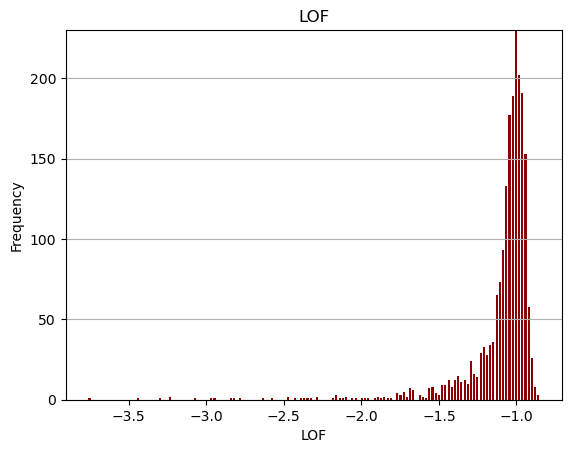

In [941]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.65, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')



In [942]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-2.25, scores) # Contaminacion del medio



0.01093983092988563

In [943]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.01093983092988563)
labels = lof.fit_predict(X.values)

# Obtenemos los indices de los datos que son inliners
indices = list(np.where(labels==1)[0])

# Eliminamos los outliers del dataset 'data', filtrando el dataset solo con los datos
# que no son inliners (label = 1)
X = X.iloc[indices]


In [944]:
y = y.iloc[indices]

In [945]:
print(X.shape, y.shape)

(1989, 9) (1989, 2)


### Classes

In [946]:
y['Potability'].value_counts() # Balanceo de clases

Potability
0    1190
1     799
Name: count, dtype: int64

In [947]:
y['contaminationLevel'].value_counts().sort_index()

contaminationLevel
0.0      5
0.1     68
0.2    322
0.3    519
0.4    468
0.5    331
0.6    164
0.7     81
0.8     26
0.9      4
1.0      1
Name: count, dtype: int64

### Clustering
#### Normalization


In [948]:
X_ = MinMaxScaler().fit_transform(X.values)


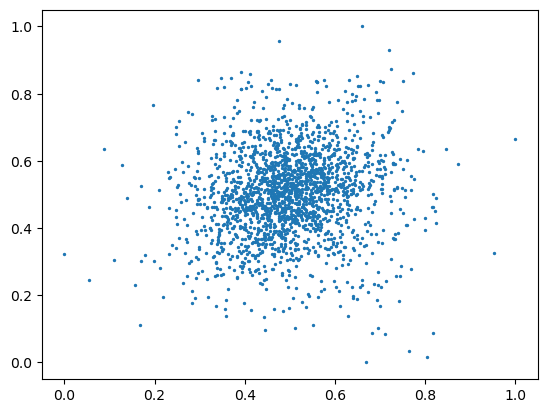

In [949]:
plt.scatter(X_[:, 0], X_[:, 1], s=2)
plt.show()

In [950]:
pca = PCA(0.95, whiten=True)
X_ = pca.fit_transform(X_)

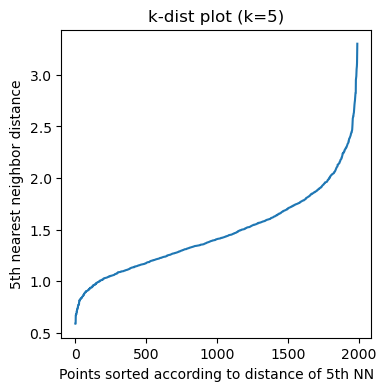

In [951]:
# Kdist para minPts = 5
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_)
distances, indices = neighbors_fit.kneighbors(X_)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 5th NN")
plt.ylabel("5th nearest neighbor distance")
plt.title("k-dist plot (k=5)")
plt.plot(distances)
plt.show()

In [952]:
# K-dist nos dice que tenemos que usar un eps aprox a 2.75
dbscan = cluster.DBSCAN(eps=2, min_samples=3)
model = dbscan.fit(X_)

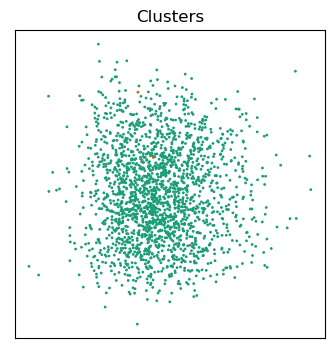

In [953]:
y_pred = model.labels_.astype(int) # en esta parte vemos en qué cluster quedó cada dato

def colour(x):
    return plt.cm.Dark2(x)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Clusters")
plt.scatter(X_[:, 0], X_[:, 1], s=1, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

In [954]:
optics = cluster.OPTICS(min_samples=3, min_cluster_size=0.3)
optics = optics.fit(X_)

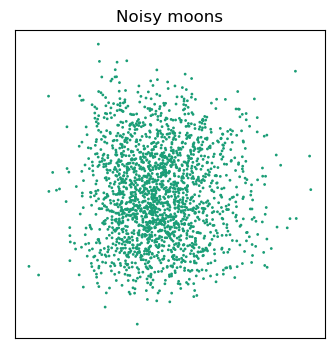

In [955]:
y_pred = optics.labels_.astype(int)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X_[:, 0], X_[:, 1], s=1, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

In [956]:
space = np.arange(len(X_))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

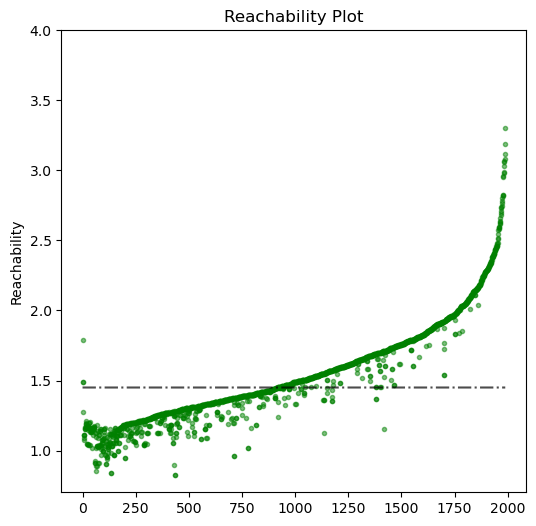

In [957]:
_, ax = plt.subplots(figsize=(6, 6))

# Reachability plot
colors = ["g.", "r."]
for klass, color in zip(range(0, 2), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax.plot(Xk, Rk, color, alpha=0.5)
ax.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.7)
ax.plot(space, np.full_like(space, 1.45, dtype=float), "k-.", alpha=0.7)
ax.set_ylim(top=4)
ax.set_ylabel("Reachability")
ax.set_title("Reachability Plot")
plt.show()

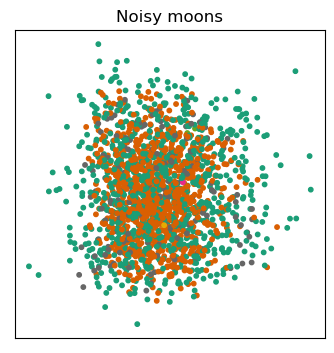

In [958]:
dbscan_2 = cluster.DBSCAN(eps=1.45, min_samples=2)
model = dbscan_2.fit(X_)

y_pred = model.labels_.astype(int) # en esta parte vemos en qué cluster quedó cada dato

def colour(x):
    return plt.cm.Dark2(x)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X_[:, 0], X_[:, 1], s=10, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

In [959]:
hyperparams = [
    {'eps': 1.0, 'min_samples': 2},
    {'eps': 1.22, 'min_samples': 2},
    {'eps': 1.22, 'min_samples': 3},
    {'eps': 1.22, 'min_samples': 4},
    {'eps': 1.5, 'min_samples': 2},
    {'eps': 1.5, 'min_samples': 3},
    {'eps': 2.0, 'min_samples': 5},
    {'eps': 2.5, 'min_samples': 10},
    {'eps': 2.75, 'min_samples': 4},
    {'eps': 2.75, 'min_samples': 3},
    {'eps': 2.75, 'min_samples': 2},

]

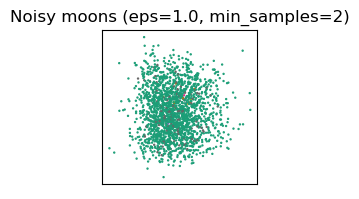

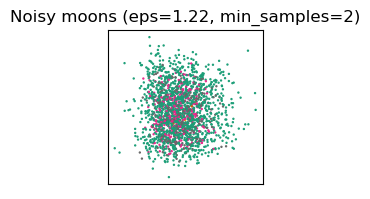

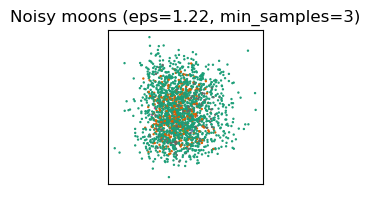

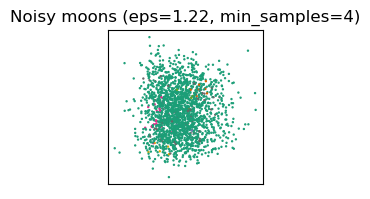

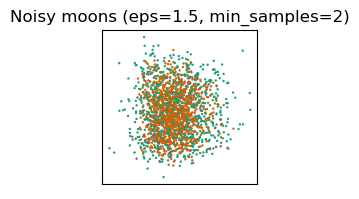

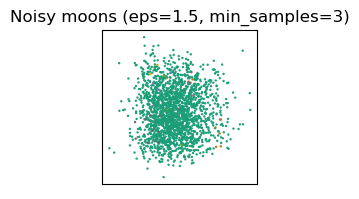

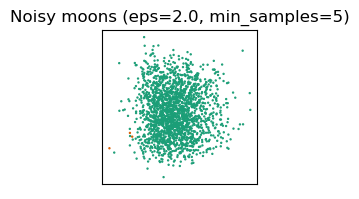

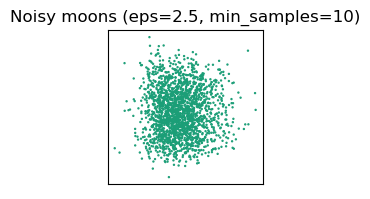

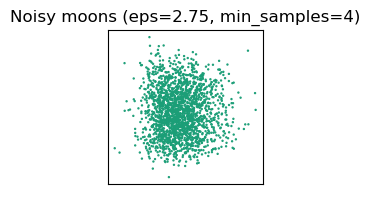

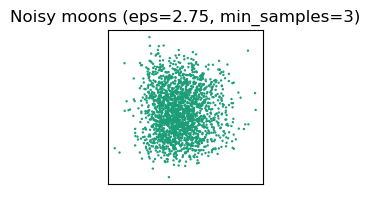

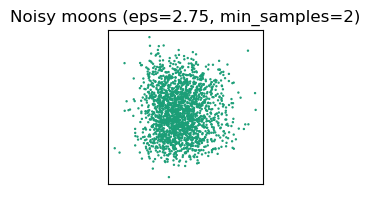

In [960]:

def colour(x):
    return plt.cm.Dark2(x)


for params in hyperparams:

    dbscan = cluster.DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    model = dbscan.fit(X_)


    y_pred = model.labels_.astype(int)

    colors = list(map(colour, y_pred))


    plt.figure(figsize=(2, 2))
    plt.title(f"Noisy moons (eps={params['eps']}, min_samples={params['min_samples']})")
    plt.scatter(X_[:, 0], X_[:, 1], s=0.5, color=colors)
    plt.xticks(())
    plt.yticks(())
    plt.show()